© 版权所有 ChenJicheng

# <b><span style='font-size:15px'>|</span> 手写数字识别：图像处理与模型泛化 </b>

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import os
import cv2
from PIL import Image

In [67]:
writting = pd.read_csv('D:/python_work/Machine Learning Final Project/written_digits/train.csv',header=0,index_col='Train_txt_name')
writting.head(10)

,Digit
Train_txt_name,
0,9
1,0
2,3
3,6
4,2
5,5
6,2
7,4
8,2


<a href="将txt文件以numpy读取出来" title="Load the txt paths">将txt文件以numpy读取出来</a>

In [68]:
read_path = "D:/python_work/Machine Learning Final Project/written_digits/train/{0}.txt"
num = 0
valid_paths = []
while os.path.exists(read_path.format(num)):
    valid_paths.append(read_path.format(num))
    num += 1
num

1934

In [69]:
txt = np.loadtxt(valid_paths[0],dtype=str)
print(len(txt),len(txt[0]))

32 32


In [70]:
import warnings
warnings.filterwarnings("ignore")

In [71]:
if num is not 1934:
    num = 1934
save_paths = []
origin_data = pd.DataFrame(columns=['{0}'.format(i) for i in range(32*32)])
for k in range(num):
    txt = np.loadtxt(valid_paths[k],dtype=str)
    new_txt = np.empty((32,32))
    for i in range(len(txt)):
        for j in range(len(txt[i])):
            new_txt[i,j] = int(txt[i][j])
    oragypic_np = new_txt.reshape(32*32)
    origin_data.loc[k] = oragypic_np
    matplotlib.image.imsave('D:/python_work/Machine Learning Final Project/written_digits/my_tab/{0}.png'.format(k),new_txt)
    save_paths.append('D:/python_work/Machine Learning Final Project/written_digits/my_tab/{0}.png'.format(k))
origin_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<a href="提取边缘" title="Emphasize edges">提取边缘</a>  
<font face="黑体" color=black size=4>此后datr2为原始图片数据，datr1为图片边缘数据</font>

<font face="黑体" color=lightblue size=4>不被使用的轮廓特征代码废案</font>
<font face="微软雅黑" color=grey size=3>  
&emsp;&emsp;ret, thresh = cv2.threshold(edge, 127, 255, 0) #图像像素大于127为255，否则为0  
&emsp;&emsp;contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)  
&emsp;&emsp;cv2.drawContours(img, contours, -1, (0,255,0), 1)
</font>

In [72]:
pic_data = pd.DataFrame(columns=['{0}'.format(i) for i in range(32*32)])
for i in range(num):   
    img = cv2.imread(save_paths[i],cv2.COLOR_BGR2GRAY)
    edge = cv2.Canny(img,32,32)
    im_np2 = np.array(edge)
    im_np1 = im_np2.reshape(32*32)
    pic_data.loc[i] = im_np1
pic_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,255,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,255,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,255,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,255,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,255,0,...,0,0,0,255,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,255,0,0,...,0,0,0,0,0,255,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,255,0,0,255,0,0,0,0,0


<a href="数据分割" title="Divide the data">数据分割</a>
<font face="黑体" color=black size=4>并对没有标签的测试集做处理</font>

In [73]:
read_path = "D:/python_work/Machine Learning Final Project/written_digits/test_no_label/{0}.txt"
num = 1934
valid_paths = [] #重置
while os.path.exists(read_path.format(num)):
    valid_paths.append(read_path.format(num))
    num += 1
num

2880

In [74]:
if num is not 2880:
    num = 2880
save_paths = [] #重置
origin_dats = pd.DataFrame(columns=['{0}'.format(i) for i in range(32*32)])
for k in range(1934,num):
    txt = np.loadtxt(valid_paths[k - 1934],dtype=str)
    new_txt = np.empty((32,32))
    for i in range(len(txt)):
        for j in range(len(txt[i])):
            new_txt[i,j] = int(txt[i][j])
    oragypic_np = new_txt.reshape(32*32)
    origin_dats.loc[k] = oragypic_np
    matplotlib.image.imsave('D:/python_work/Machine Learning Final Project/written_digits/my_tab/{0}.png'.format(k),new_txt)
    save_paths.append('D:/python_work/Machine Learning Final Project/written_digits/my_tab/{0}.png'.format(k))
origin_dats.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
1934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
pic_ts2 = origin_dats #未经边缘处理的无标签测试集

<font face="黑体" color=red size=4>同样pic_ts2为原始测试图片数据，pic_ts1为边缘化处理后的测试数据</font>

In [76]:
pic_ts1 = pd.DataFrame(columns=['{0}'.format(i) for i in range(32*32)])
for i in range(num - 1934):   
    img = cv2.imread(save_paths[i],cv2.COLOR_BGR2GRAY)
    edge = cv2.Canny(img,32,32)
    im_np2 = np.array(edge)
    im_np1 = im_np2.reshape(32*32)
    pic_ts1.loc[i] = im_np1
pic_ts1.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,255,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,255,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,255,0,...,255,0,0,255,0,0,255,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
for i in range(len(writting)):
    pic_data.loc[i,'label'] = writting.loc[i,'Digit']

In [78]:
datr1 = pic_data[['{0}'.format(i) for i in range(32*32)]]
datr2 = origin_data
label = writting['Digit']

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(datr1,label,test_size=0.4,random_state=0,stratify=label)
X_train2, X_test2, y_train2, y_test2 = train_test_split(datr2,label,test_size=0.4,random_state=0,stratify=label)

<a href="线性模型训练" title="Training the linear model">线性模型训练</a>

In [80]:
from sklearn.linear_model import LogisticRegression as LgR
from sklearn.model_selection import GridSearchCV

params_LR = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],\
    'multi_class':['ovr','multinomial']}

In [81]:
lr_grid = GridSearchCV(LgR(),params_LR,cv=5,refit=True)
lr_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'multi_class': ['ovr', 'multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [82]:
params = lr_grid.best_estimator_.get_params()
print(params['multi_class'],params['solver'])

multinomial newton-cg


In [83]:
lr2 = LgR(multi_class='multinomial',solver='saga')
lr2.fit(X_train2,y_train2)

LogisticRegression(multi_class='multinomial', solver='saga')

In [84]:
from sklearn.metrics import classification_report

y_pre = lr_grid.predict(X_test)
y_pre2 = lr2.predict(X_test2)
print(classification_report(list(y_pre),y_test.tolist()))
print(classification_report(list(y_pre2),y_test2.tolist()))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        79
           1       0.75      0.81      0.78        73
           2       0.90      0.86      0.88        81
           3       0.84      0.86      0.85        78
           4       0.82      0.92      0.87        66
           5       0.85      0.91      0.88        70
           6       0.95      0.97      0.96        76
           7       0.93      0.89      0.91        83
           8       0.74      0.65      0.69        81
           9       0.79      0.75      0.77        87

    accuracy                           0.85       774
   macro avg       0.85      0.85      0.85       774
weighted avg       0.85      0.85      0.85       774

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       0.92      0.91      0.92        80
           2       0.92      0.96      0.94        75
           3       0.99 

In [85]:
from sklearn.model_selection import cross_val_score as cvs

score1 = cvs(LgR(),datr1,label,cv = 10)
score2 = cvs(LgR(),datr2,label,cv = 10)
print(score1.mean(),score2.mean())

0.856743763687837 0.9643234869932161


<a href="在全集上重新训练线性模型" title="Retrain the linear model in the whole training data">在全集上重新训练线性模型</a>

In [86]:
LgR_model1 = LgR(multi_class='multinomial',solver='saga')
LgR_model1.fit(datr1,label)

LogisticRegression(multi_class='multinomial', solver='saga')

In [87]:
LgR_model2 = LgR(multi_class='multinomial',solver='saga')
LgR_model2.fit(datr2,label)

LogisticRegression(multi_class='multinomial', solver='saga')

In [88]:
if num is not 2880:
    num = 2880
origin_path = 'D:/python_work/Machine Learning Final Project/written_digits/{0}'
pre1 = LgR_model1.predict(pic_ts1)
pre2 = LgR_model2.predict(pic_ts2)
pre_csv = pd.DataFrame(pre1,columns=['pre1'])
pre_csv['pre2'] = pre2
pre_csv.index = [i for i in range(1934,num)]
pre_csv.to_excel(origin_path.format('pre.xlsx'))

In [89]:
import openpyxl
from openpyxl.utils import get_column_letter

In [90]:
book = openpyxl.load_workbook(origin_path.format('pre.xlsx'))
worksheet = book['Sheet1']
for i in range(1934,num):
    img = openpyxl.drawing.image.Image(origin_path.format('my_tab/{0}.png'.format(i)))
    img.anchor = 'A{0}'.format(i - 1932)
    worksheet.add_image(img)
worksheet['A1']='原图'
for i in range(1, worksheet.max_row+1):
    worksheet.row_dimensions[i].height = 30
for i in range(1, worksheet.max_column+1):
    worksheet.column_dimensions[get_column_letter(i)].width = 30
book.save(origin_path.format('pre.xlsx'))

<font face="微软雅黑" color=brown size=4>从pre.xlsx中可以看出，边缘化处理使得一些图片信息丢失</font>

In [91]:
difference = pre1 - pre2
sum = 0
for i in difference:
    if int(i) is not 0:
        sum += 1
sum

100

<a href="支持向量机" title="Supporting Vector Machine">支持向量机</a>

In [92]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier #二分类器的多分类化工具

In [93]:
svm1 = OneVsRestClassifier(SVC())
svm1.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC())

In [94]:
svm2 = OneVsRestClassifier(SVC())
svm2.fit(X_train2,y_train2)

OneVsRestClassifier(estimator=SVC())

In [95]:
y_pre = svm1.predict(X_test)
y_pre2 = svm2.predict(X_test2)
print(classification_report(list(y_pre),y_test.tolist()))
print(classification_report(list(y_pre2),y_test2.tolist()))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        78
           1       0.92      0.88      0.90        83
           2       0.92      0.89      0.91        81
           3       0.88      0.92      0.90        76
           4       0.85      0.90      0.88        70
           5       0.85      0.96      0.90        67
           6       0.96      0.95      0.96        79
           7       0.95      0.83      0.88        92
           8       0.83      0.82      0.83        73
           9       0.76      0.83      0.79        75

    accuracy                           0.89       774
   macro avg       0.89      0.89      0.89       774
weighted avg       0.89      0.89      0.89       774

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       0.97      0.95      0.96        81
           2       0.97      0.99      0.98        77
           3       0.99 

<a href="在全集上重新训练SVM模型" title="Retrain the SVM model in the whole training data">在全集上重新训练SVM模型</a>

In [96]:
svm_model1 = OneVsRestClassifier(SVC())
svm_model1.fit(datr1,label)
svm_model2 = OneVsRestClassifier(SVC())
svm_model2.fit(datr2,label)

OneVsRestClassifier(estimator=SVC())

In [97]:
pre3 = svm_model1.predict(pic_ts1)
pre4 = svm_model2.predict(pic_ts2)

In [98]:
difference = pre3 - pre4
sum = 0
for i in difference:
    if int(i) is not 0:
        sum += 1
sum

74

<font face="微软雅黑" color=brown size=4>sum of the difference：74 < 103, 说明基本模型的改进能够有效地提升泛化性能</font>

In [99]:
book = openpyxl.load_workbook(origin_path.format('pre.xlsx'))
worksheet = book['Sheet1']
for i in range(1934,2880):
    worksheet['D{0}'.format(i - 1932)] = pre3[i - 1934]
    worksheet['E{0}'.format(i - 1932)] = pre4[i - 1934]
worksheet['D1'] = 'pre3'
worksheet['E1'] = 'pre4'
worksheet.column_dimensions['D'].width = 30
worksheet.column_dimensions['E'].width = 30
book.save(origin_path.format('pre.xlsx'))

<a href="K近邻算法" title="K Nearest Neiberhood">K近邻(仅在datr2上训练)</a>

In [100]:
from sklearn.neighbors import KNeighborsClassifier as KNC

params_KNN = {'n_neighbors':[1,2,3,4,5,6,7]}

In [101]:
knn_grid = GridSearchCV(KNC(),params_KNN,cv=5,refit=True)
knn_grid.fit(datr2,label)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7]})

In [102]:
params = knn_grid.best_estimator_.get_params()
print(params['n_neighbors'])

3


In [103]:
pre5 = knn_grid.predict(pic_ts2)

In [104]:
book = openpyxl.load_workbook(origin_path.format('pre.xlsx'))
worksheet = book['Sheet1']
for i in range(1934,2880):
    worksheet['F{0}'.format(i - 1932)] = pre5[i - 1934]
worksheet['F1'] = 'pre5'
worksheet.column_dimensions['F'].width = 30
book.save(origin_path.format('pre.xlsx'))

In [105]:
corrects = 0
for pre in [pre1,pre2,pre3,pre4]:
    matches = pre5==pre
    correct = np.count_nonzero(matches)
    corrects += correct
print(len(pre5)-corrects/4)

57.75


<a href="随机森林" title="Random Forest Classifier">随机森林(仅在datr2上训练)</a>

In [106]:
from sklearn.ensemble import RandomForestClassifier as RFTC

RFT_para = {'criterion': ['gini','entropy'],'min_samples_split':[2,3,4,5],'n_estimators':[40,80,100,120,150]}

In [107]:
rft_grid = GridSearchCV(RFTC(),RFT_para,cv=5,refit=True)
rft_grid.fit(datr2,label)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [40, 80, 100, 120, 150]})

In [108]:
params = rft_grid.best_estimator_.get_params()
print(params['criterion'],params['min_samples_split'],params['n_estimators'])

gini 4 120


In [111]:
rft_model = RFTC(criterion='gini',min_samples_split=2,n_estimators=150)
rft_model.fit(datr2,label)
pre6 = rft_model.predict(pic_ts2)

In [112]:
book = openpyxl.load_workbook(origin_path.format('pre.xlsx'))
worksheet = book['Sheet1']
for i in range(1934,2880):
    worksheet['G{0}'.format(i - 1932)] = pre6[i - 1934]
worksheet['G1'] = 'pre6'
worksheet.column_dimensions['G'].width = 30
book.save(origin_path.format('pre.xlsx'))

In [113]:
corrects = 0
for pre in [pre1,pre2,pre3,pre4,pre5]:
    matches = pre6==pre
    correct = np.count_nonzero(matches)
    corrects += correct
print(len(pre6)-corrects/5)

46.39999999999998


<a href="梯度优化决策树" title="Gradient boosting decision tree">梯度优化决策树(仅在datr2上训练)</a>

In [114]:
from sklearn.ensemble import GradientBoostingClassifier as GDBTC

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01}

In [115]:
gdbt_rft = GDBTC(**params)
gdbt_rft.fit(datr2,label)
pre7 = gdbt_rft.predict(pic_ts2)

In [116]:
book = openpyxl.load_workbook(origin_path.format('pre.xlsx'))
worksheet = book['Sheet1']
for i in range(1934,2880):
    worksheet['H{0}'.format(i - 1932)] = pre7[i - 1934]
worksheet['H1'] = 'pre7'
worksheet.column_dimensions['H'].width = 30
book.save(origin_path.format('pre.xlsx'))

In [117]:
corrects = 0
for pre in [pre1,pre2,pre3,pre4,pre5,pre6]:
    matches = pre7==pre
    correct = np.count_nonzero(matches)
    corrects += correct
print(len(pre7)-corrects/6)

47.0


<a href="神经网络" title="Neural network">神经网络(在datr1,datr2上训练)</a>

In [118]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(datr1)
X = scaler.transform(datr1)

In [119]:
MLPC_para = {'hidden_layer_sizes':[(i,j) for i in range(160,200,20) for j in range(70,90,10)]}

In [120]:
mlp_grid = GridSearchCV(MLPClassifier(),MLPC_para,cv = 5,refit=True)
mlp_grid.fit(X_train,y_train)
params = mlp_grid.best_estimator_.get_params()
print(params['hidden_layer_sizes'])

(160, 80)


In [121]:
MLPC_para = {'hidden_layer_sizes':[(i,j) for i in range(180,220,20) for j in range(90,110,10)]}

In [122]:
mlp_grid = GridSearchCV(MLPClassifier(),MLPC_para,cv = 5,refit=True)
mlp_grid.fit(X_train2,y_train2)
params = mlp_grid.best_estimator_.get_params()
print(params['hidden_layer_sizes'])

(180, 90)


In [123]:
params1 = {'solver':'lbfgs' ,'alpha':1e-5,'hidden_layer_sizes':(180, 80)}
params2 = {'solver':'lbfgs' ,'alpha':1e-5,'hidden_layer_sizes':(200, 100)}

clf1 = MLPClassifier(**params1)
clf1.fit(X_train,y_train)
clf2 = MLPClassifier(**params2)
clf2.fit(X_train2,y_train2)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(200, 100), solver='lbfgs')

In [124]:
y_pre = clf1.predict(X_test)
y_pre2 = clf2.predict(X_test2)
print(classification_report(list(y_pre),y_test.tolist()))
print(classification_report(list(y_pre2),y_test2.tolist()))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        92
           1       0.47      0.71      0.56        52
           2       0.71      0.61      0.65        90
           3       0.62      0.49      0.55       102
           4       0.47      0.57      0.52        61
           5       0.43      0.47      0.45        68
           6       0.68      0.61      0.64        87
           7       0.57      0.69      0.63        67
           8       0.47      0.46      0.47        74
           9       0.37      0.37      0.37        81

    accuracy                           0.56       774
   macro avg       0.56      0.56      0.55       774
weighted avg       0.57      0.56      0.56       774

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        77
           1       0.91      0.91      0.91        79
           2       0.94      0.96      0.95        76
           3       0.97 

In [125]:
mlp1 = MLPClassifier(**params1)
mlp1.fit(datr1,label)
mlp2 = MLPClassifier(**params2)
mlp2.fit(datr2,label)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(200, 100), solver='lbfgs')

In [126]:
pre8 = mlp1.predict(pic_ts1)
pre9 = mlp2.predict(pic_ts2)

In [127]:
book = openpyxl.load_workbook(origin_path.format('pre.xlsx'))
worksheet = book['Sheet1']
for i in range(1934,2880):
    worksheet['I{0}'.format(i - 1932)] = pre8[i - 1934]
    worksheet['J{0}'.format(i - 1932)] = pre9[i - 1934]
worksheet['I1'] = 'pre8'
worksheet['J1'] = 'pre9'
worksheet.column_dimensions['I'].width = 30
worksheet.column_dimensions['J'].width = 30
book.save(origin_path.format('pre.xlsx'))

In [128]:
def same_call(compare):
    corrects = 0
    for pre in [pre1,pre2,pre3,pre4,pre5,pre6,pre7]:
        matches = compare==pre
        correct = np.count_nonzero(matches)
        corrects += correct
    return len(compare)-corrects/7
print(same_call(pre8),same_call(pre9))

320.1428571428571 44.428571428571445


<a href="Stacking集成" title="Stacking">多种模型的异质集成</a>
<font face="黑体" color=gray size=4>训练耗时极大，建议直接从'eVclf2.picle'中load</font>

In [133]:
from sklearn.ensemble import StackingClassifier as SKC

eVclf2 = SKC(estimators=[('lg1',LgR_model1),('lg2',LgR_model2),('svm1',svm_model1),('svm2',svm_model2),\
    ('knn',knn_grid),('RFTC',rft_model),('GDBT',gdbt_rft),('MLPC1',mlp1),('MLPC2',mlp2)])
datr = pd.concat([datr1,datr2],axis=0)
labels = pd.concat([label,label],axis=0)
eVclf2.fit(datr,labels)

StackingClassifier(estimators=[('lg1',
                                LogisticRegression(multi_class='multinomial',
                                                   solver='saga')),
                               ('lg2',
                                LogisticRegression(multi_class='multinomial',
                                                   solver='saga')),
                               ('svm1', OneVsRestClassifier(estimator=SVC())),
                               ('svm2', OneVsRestClassifier(estimator=SVC())),
                               ('knn',
                                GridSearchCV(cv=5,
                                             estimator=KNeighborsClassifier(),
                                             param_grid={'n_neighbors': [1, 2,
                                                                         3, 4,
                                                                         5, 6,
                                                                         7]})),
                               ('RFTC',
                                RandomForestClassifier(n_estimators=150)),
                               ('GDBT',
                                GradientBoostingClassifier(learning_rate=0.01,
                                                           max_depth=4,
                                                           n_estimators=500)),
                               ('MLPC1',
                                MLPClassifier(alpha=1e-05,
                                              hidden_layer_sizes=(180, 80),
                                              solver='lbfgs')),
                               ('MLPC2',
                                MLPClassifier(alpha=1e-05,
                                              hidden_layer_sizes=(200, 100),
                                              solver='lbfgs'))])

In [140]:
import pickle

with open(origin_path.format('eVclf2.pickle'), 'wb') as f:
    pickle.dump(eVclf2, f)
#eco_various

In [134]:
pre_all1 = eVclf2.predict(pic_ts1)
pre_all2 = eVclf2.predict(pic_ts2)

In [135]:
difference = pre_all1 - pre_all2
sum = 0
for i in difference:
    if int(i) is not 0:
        sum += 1
sum

70

In [157]:
corrects = 0
for pre in [pre1,pre2,pre3,pre4,pre5,pre6,pre7,pre9]:
    matches = pre_all2==pre
    correct = np.count_nonzero(matches)
    corrects += correct
print(len(pre_all2)-corrects/8)

33.25


In [136]:
book = openpyxl.load_workbook(origin_path.format('pre.xlsx'))
worksheet = book['Sheet1']
for i in range(1934,2880):
    worksheet['K{0}'.format(i - 1932)] = pre_all1[i - 1934]
    worksheet['L{0}'.format(i - 1932)] = pre_all2[i - 1934]
worksheet['K1'] = 'final pre1'
worksheet['L1'] = 'final pre2'

In [141]:
for i in range(1, worksheet.max_row+1):
    worksheet.row_dimensions[i].height = 25
for i in range(1, worksheet.max_column+1):
    worksheet.column_dimensions[get_column_letter(i)].width = 10
book.save(origin_path.format('pre.xlsx'))

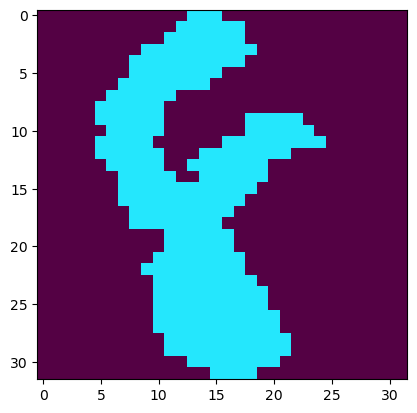

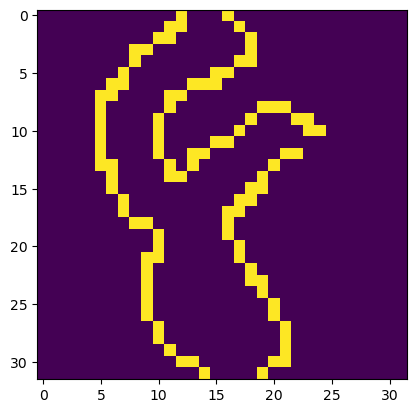

In [154]:
img = cv2.imread(save_paths[945],cv2.COLOR_BGR2GRAY)
plt.figure(1)
plt.imshow(img)
edge = cv2.Canny(img,32,32)
plt.figure(2)
plt.imshow(edge)

<font face="黑体" color=red size=4>轮廓数据非常有迷惑性，看起来像4实际是8</font>

In [149]:
eVclf2.predict(pic_ts1.tail(1))

array([8], dtype=int64)